In [1]:


import torch
from torch import nn
import gensim
import fasttext
from gensim.models import FastText
import random
import operator
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

C:\Users\ntaylor\Anaconda3\envs\deeplearning\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
filename = "../clinicalBERT/word2vec+fastText/word2vec+fastText/word2vec.model"
filename2 = "./data/mimic3/new_mimic_word2vec_200.model"

In [3]:
model = gensim.models.KeyedVectors.load(f'{filename}')

      


# load in gensim format
weights = model.wv

# convert to tensor for pytorch
weights = torch.FloatTensor(model.wv.vectors)
print("weights vector shape: ", weights.shape)

# convert to embedding layer
embedding = nn.Embedding.from_pretrained(weights)

print("embedding tensor shape: ", embedding)

words = model.wv.index_to_key
# get the word2vec dictionary {'word':vector}
word2vec = {word: model.wv[word] for word in words}

# get the vec2index array - essentially the vector arrays are in the index position corresponding to the word in word2vec
index2vec = model.wv[model.wv.index_to_key]

# index to words - just a list of words in correct index position

index2word = words
print("length of indices to words: ", len(index2word))



key2index = model.wv.key_to_index

weights vector shape:  torch.Size([44082, 100])
embedding tensor shape:  Embedding(44082, 100)
length of indices to words:  44082


In [4]:
# lets begin by getting the vocab by index and the associated vectors X
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]

In [5]:
vocab

['service',
 'addendum',
 'radiologic',
 'studies',
 'also',
 'included',
 'chest',
 'ct',
 'which',
 'confirmed',
 'cavitary',
 'lesions',
 'in',
 'the',
 'left',
 'lung',
 'apex',
 'consistent',
 'with',
 'infectious',
 'process',
 'tuberculosis',
 'this',
 'moderate',
 'sized',
 'pleural',
 'effusion',
 'head',
 'showed',
 'no',
 'intracranial',
 'hemorrhage',
 'or',
 'mass',
 'effect',
 'but',
 'old',
 'infarction',
 'past',
 'medical',
 'history',
 'abdominal',
 'of',
 'and',
 'sacrum',
 'most',
 'likely',
 'secondary',
 'to',
 'osteoporosis',
 'these',
 'can',
 'be',
 'followed',
 'by',
 'repeat',
 'imaging',
 'as',
 'an',
 'outpatient',
 'md',
 'dictated',
 'medquist',
 'job',
 'date',
 'birth',
 'sex',
 'micu',
 'then',
 'medicine',
 'present',
 'illness',
 'is',
 'year',
 'female',
 'emphysema',
 'not',
 'on',
 'home',
 'who',
 'presents',
 'three',
 'days',
 'shortness',
 'breath',
 'thought',
 'her',
 'primary',
 'care',
 'doctor',
 'copd',
 'flare',
 'two',
 'prior',
 'admi

In [8]:
model = gensim.models.KeyedVectors.load(f'{filename2}')

      


# load in gensim format
weights = model.wv

# convert to tensor for pytorch
weights = torch.FloatTensor(model.wv.vectors)
print("weights vector shape: ", weights.shape)

# convert to embedding layer
embedding = nn.Embedding.from_pretrained(weights)

print("embedding tensor shape: ", embedding)

words = model.wv.index_to_key
# get the word2vec dictionary {'word':vector}
word2vec = {word: model.wv[word] for word in words}

# get the vec2index array - essentially the vector arrays are in the index position corresponding to the word in word2vec
index2vec = model.wv[model.wv.index_to_key]

# index to words - just a list of words in correct index position

index2word = words
print("length of indices to words: ", len(index2word))



key2index = model.wv.key_to_index

weights vector shape:  torch.Size([337754, 200])
embedding tensor shape:  Embedding(337754, 200)
length of indices to words:  337754


In [9]:
vocab = list(model.wv.key_to_index)
vocab

['and',
 'the',
 'to',
 'of',
 'with',
 'for',
 'in',
 'is',
 'on',
 'was',
 'no',
 '-',
 'a',
 'at',
 '.',
 'pt',
 'as',
 'left',
 'or',
 'patient',
 'mg',
 'he',
 'this',
 'ml',
 'right',
 'po',
 'am',
 'there',
 'not',
 'are',
 'blood',
 'she',
 'from',
 '/',
 '#',
 'tablet',
 'be',
 'his',
 'has',
 'pm',
 'one',
 'chest',
 'sig:',
 'but',
 ',',
 'her',
 'by',
 'had',
 '2',
 'ct',
 'were',
 'given',
 'normal',
 '5',
 'daily',
 's/p',
 '1',
 'pain',
 '(1)',
 'other',
 'that',
 'iv',
 'medical',
 'an',
 'have',
 'history:',
 'which',
 'will',
 'acute',
 'discharge',
 'continue',
 'after',
 'also',
 'history',
 '4',
 'no(t)',
 'aortic',
 'per',
 'respiratory',
 'you',
 'prior',
 'plan:',
 'icu',
 '3',
 'your',
 'likely',
 'mild',
 'fluid',
 'pulmonary',
 'tube',
 'total',
 'report',
 '6',
 'old',
 'meq/l',
 'mg/dl',
 'heart',
 'noted',
 'ventricular',
 'valve',
 'small',
 'assessment:',
 'please',
 'without',
 'hct',
 'care',
 'evidence',
 'year',
 'been',
 'day',
 'home',
 'since',
 '

In [9]:
# run tsne clustering 

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [13]:
# put into dataframe

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
print(df.shape)
df.head()

(44082, 2)


,x,y
service,21.880339,35.379948
addendum,20.163639,28.839067
radiologic,6.948525,-38.753906
studies,5.716381,-36.339138
also,9.948288,-24.761162


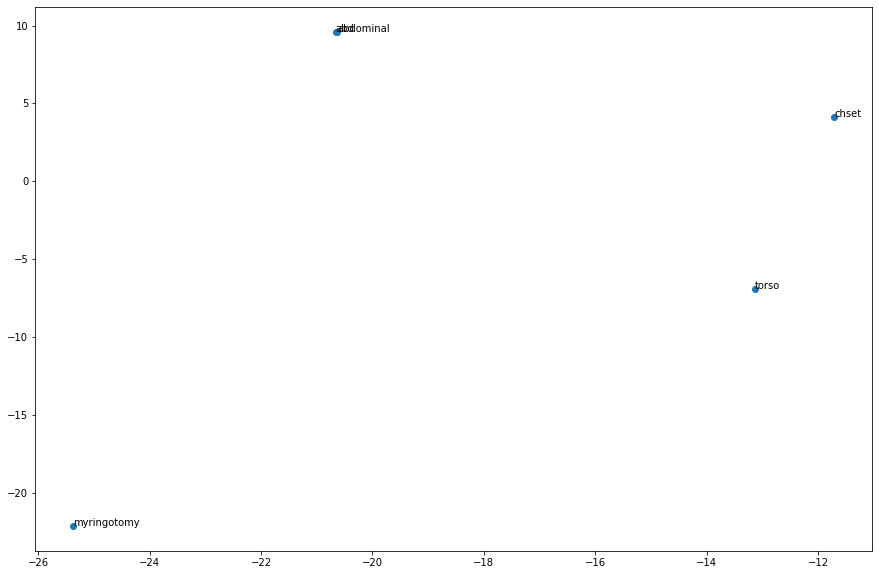

In [67]:
#lets get a subset of words similar to lung
words_sim1 = []
for item in model.wv.most_similar('chest', topn=5):
    words_sim1.append(item[0])
    
subset_df1 = df.loc[words_sim1]



plt.figure(figsize=(15,10))


plt.scatter(subset_df1['x'], subset_df1['y'])
for word, pos in subset_df1.iterrows():
    plt.annotate(word, pos)
    
plt.show()

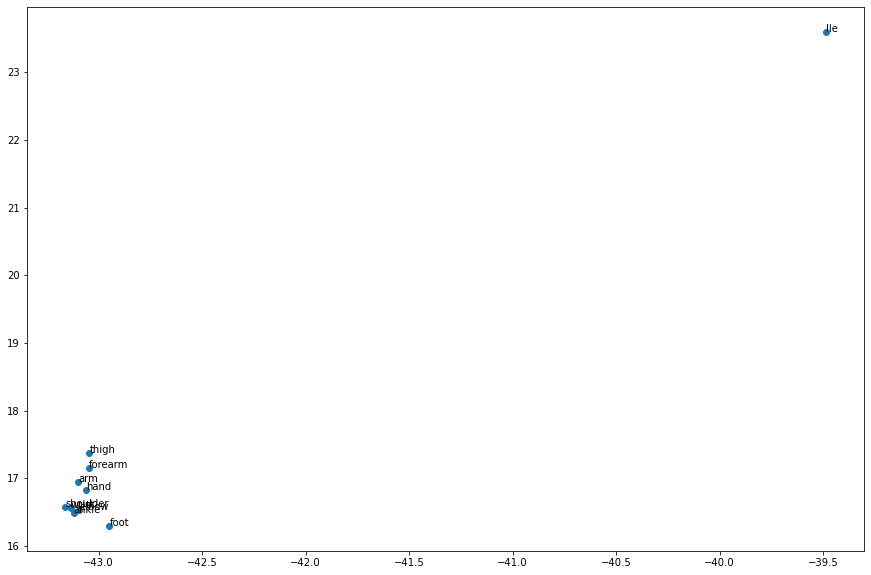

In [50]:
# thhen get words related to leg
words_sim2 = []
for item in model.wv.most_similar('leg', topn=10):
    words_sim2.append(item[0])


subset_df = df.loc[words_sim2]
subset_df.shape


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(subset_df['x'], subset_df['y'])
for word, pos in subset_df.iterrows():
    ax.annotate(word, pos)
    
plt.show()

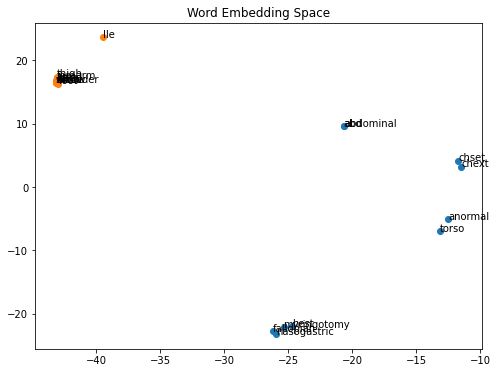

In [66]:
# plot both and colour the dots
subset_df1 = df.loc[words_sim1]
subset_df2 = df.loc[words_sim2]


plt.figure(figsize=(8,6))

# plot first one
plt.scatter(subset_df1['x'], subset_df1['y'])
for word, pos in subset_df1.iterrows():
    plt.annotate(word, pos)

#plot second one
plt.scatter(subset_df2['x'], subset_df2['y'])
for word, pos in subset_df2.iterrows():
    plt.annotate(word, pos)    

plt.title("Word Embedding Space")
plt.savefig("./artifacts/word2vec_visualisation_leg_chest.png")
plt.show()



In [43]:
word_subset = words_sim1 + words_sim2

In [35]:
word_subset

['hemithorax',
 'uaw',
 'lobe',
 'lll',
 'breat',
 'brth',
 'midlung',
 'crackley',
 'beath',
 'thyroid',
 'breast',
 'rml',
 'deminished',
 'hilar',
 'airspace',
 'infrahilar',
 'rul',
 'thryoid',
 'paramediastinal',
 'lingular',
 'arm',
 'hand',
 'foot',
 'ankle',
 'shoulder',
 'elbow',
 'thigh',
 'forearm',
 'lle',
 'wrist',
 'extremity',
 'knee',
 'calf',
 'le',
 'thumb',
 'legs',
 'rle',
 'hip',
 'heel',
 'hallux']

In [44]:
#subset these 40 words
subset_df = df.loc[word_subset]
subset_df.shape

(20, 2)

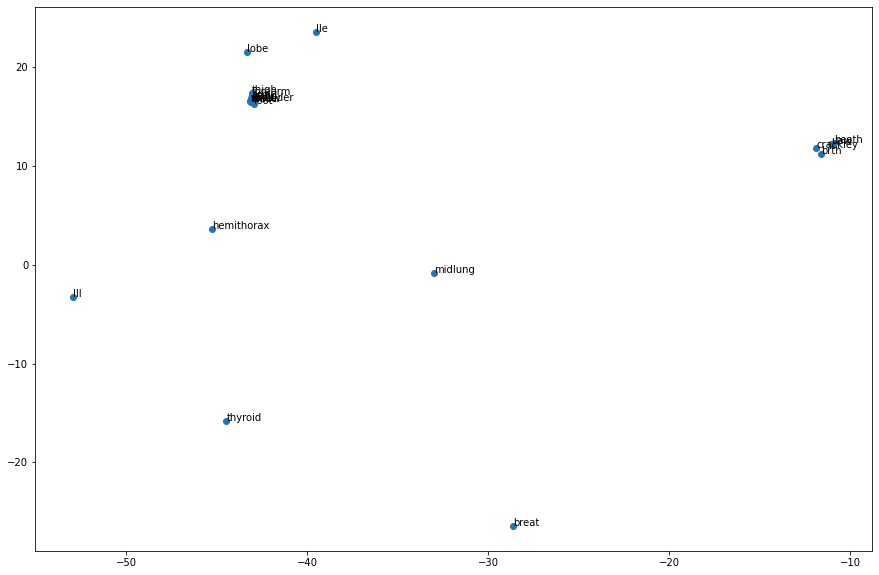

In [45]:
#  build scatter

plt.figure(figsize=(15,10))


plt.scatter(subset_df['x'], subset_df['y'])
for word, pos in subset_df.iterrows():
    plt.annotate(word, pos)
    
plt.show()

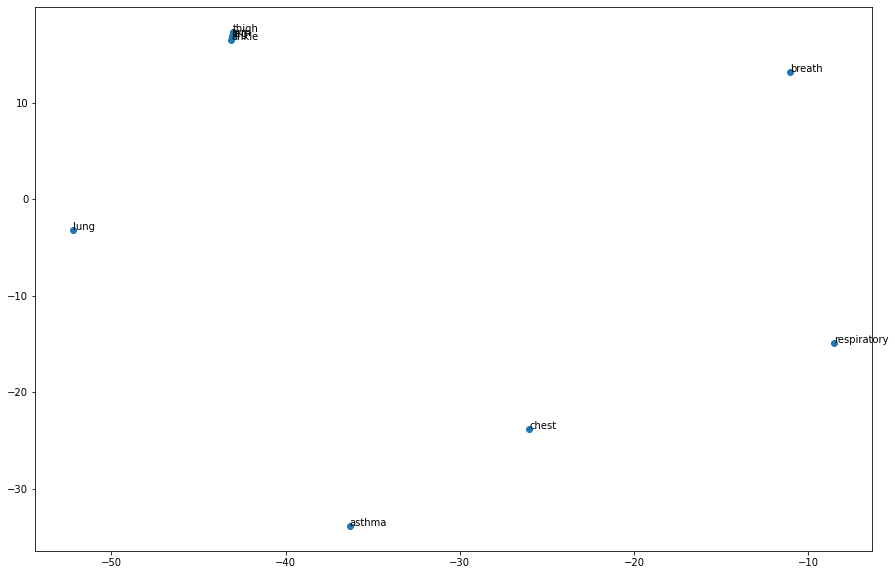

In [60]:
# lets try on our own words of interest
#subset these 40 words
word_subset = ["lung","breath", "respiratory", "asthma","chest", "leg","arm","ankle","thigh"]

subset_df = df.loc[word_subset]
subset_df.shape


plt.figure(figsize=(15,10))

plt.scatter(subset_df['x'], subset_df['y'])
for word, pos in subset_df.iterrows():
    plt.annotate(word, pos)
    
plt.show()